In [6]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

import sys
sys.path.append("../")
from src import soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_scaling as s_scaling, soporte_logistica_preprocesamiento as sl, soporte_ajuste_logistica as sal

pd.set_option('display.max_columns', None)
import xgboost as xgb


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_pickle("../datos_dfs/pickle2_stand.pkl")

In [8]:
lista_categoricas = ['BusinessTravel_cat_stand',
 'Department_cat_stand',
 'EducationField_cat_stand',
 'Gender_cat_Male_stand',
 'JobRole_cat_Healthcare Representative_stand',
 'JobRole_cat_Laboratory Technician_stand',
 'JobRole_cat_Manager_stand',
 'JobRole_cat_Manufacturing Director_stand',
 'JobRole_cat_Sales Representative_stand',
 'MaritalStatus_cat_Divorced_stand',
 'MaritalStatus_cat_Married_stand',
 'MaritalStatus_cat_Single_stand']

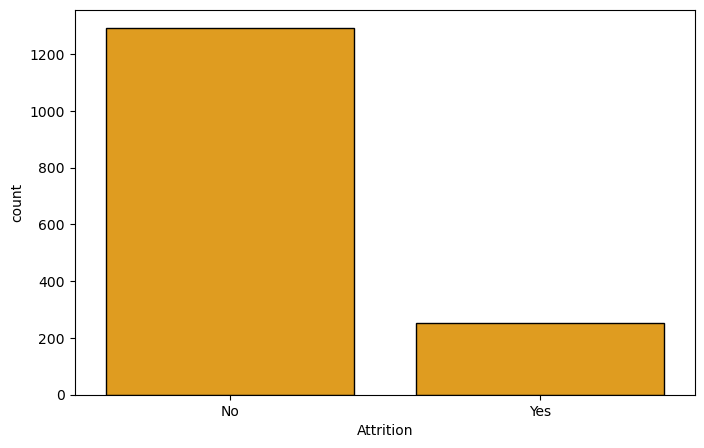

In [9]:
X = df.drop(columns=["Attrition"])  
y = df["Attrition"]  

desbalanceo = sl.Desbalanceo(dataframe = df, variable_dependiente = y)
desbalanceo.visualizar_clase()

In [10]:
# Aplicar SMOTENC para generar muestras sintéticas
smotenc = SMOTENC(categorical_features=lista_categoricas, random_state=42)
X_res, y_res = smotenc.fit_resample(X, y)

# Aplicar Tomek Links para eliminar instancias ruidosas
tomek = TomekLinks()
X_res_tomek, y_res_tomek = tomek.fit_resample(X_res, y_res)


df_balanced = pd.concat([X_res, y_res], axis= 1)

In [11]:
ajuste = sal.AnalisisModelosClasificacion(df_balanced, "Attrition")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.782293,0.782370,0.782293,0.782272,0.564565,0.865450,0.003742,NaN,NaN,NaN,regresion logistica
test,0.789168,0.791253,0.789168,0.788903,0.578628,0.869822,NaN,NaN,0.003742,NaN,regresion logistica


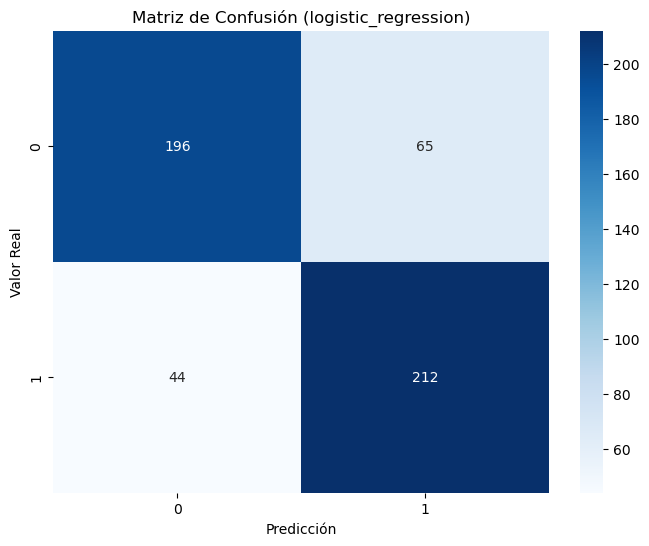

,Feature,Importance
5,EducationField_cat_stand,0.383504
1,BusinessTravel_cat_stand,0.322848
16,Gender_cat_Male_stand,0.223260
14,NumCompaniesWorked_iterative_num_stand,0.202624
2,Department_cat_stand,0.028536
4,Education_num_stand,-0.027187
7,MonthlyIncome_num_stand,-0.040325
6,JobLevel_num_stand,-0.062536
0,JobInvolvement_num_stand,-0.077540
3,DistanceFromHome_num_stand,-0.094730


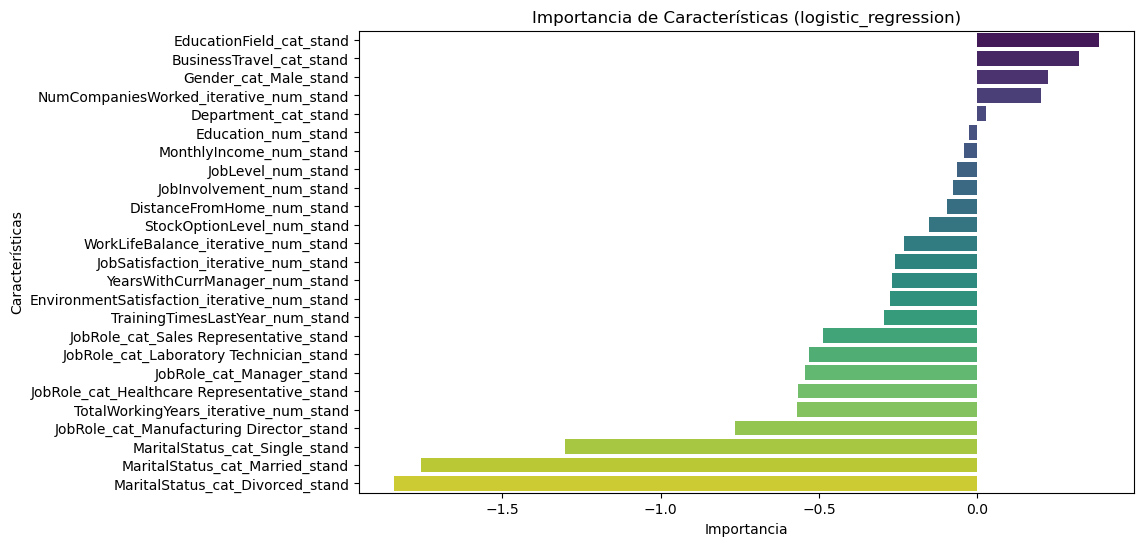

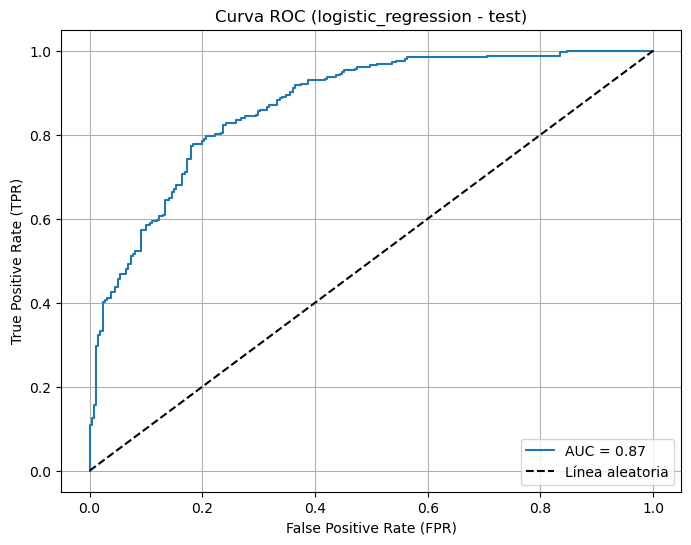

(array([0.        , 0.        , 0.        , 0.00383142, 0.00383142,
        0.00766284, 0.00766284, 0.01149425, 0.01149425, 0.01532567,
        0.01532567, 0.01915709, 0.01915709, 0.02298851, 0.02298851,
        0.02681992, 0.02681992, 0.03065134, 0.03065134, 0.03831418,
        0.03831418, 0.04597701, 0.04597701, 0.04980843, 0.04980843,
        0.05363985, 0.05363985, 0.0651341 , 0.0651341 , 0.06896552,
        0.06896552, 0.07279693, 0.07279693, 0.07662835, 0.07662835,
        0.08045977, 0.08045977, 0.09195402, 0.09195402, 0.09961686,
        0.09961686, 0.10727969, 0.10727969, 0.11111111, 0.11111111,
        0.11877395, 0.11877395, 0.12260536, 0.12260536, 0.1302682 ,
        0.1302682 , 0.13409962, 0.13409962, 0.14176245, 0.14176245,
        0.14559387, 0.14559387, 0.14942529, 0.14942529, 0.1532567 ,
        0.1532567 , 0.16475096, 0.16475096, 0.16858238, 0.16858238,
        0.17241379, 0.17241379, 0.18007663, 0.18007663, 0.18390805,
        0.18390805, 0.19923372, 0.19923372, 0.20

In [12]:
ajuste.ajustar_modelo("logistic_regression")
df_resultados_log = ajuste.calcular_metricas(modelo_nombre =  "logistic_regression" )

df_resultados_log["modelo"] = "regresion logistica"
display (df_resultados_log)
ajuste.plot_matriz_confusion("logistic_regression")
ajuste.importancia_predictores("logistic_regression")
ajuste.calcular_graficar_roc("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.914369,0.914908,0.914369,0.914345,0.828751,0.974132,0.0,16.0,NaN,NaN
test,0.802708,0.802939,0.802708,0.802631,0.605261,0.856868,NaN,NaN,0.0,16.0


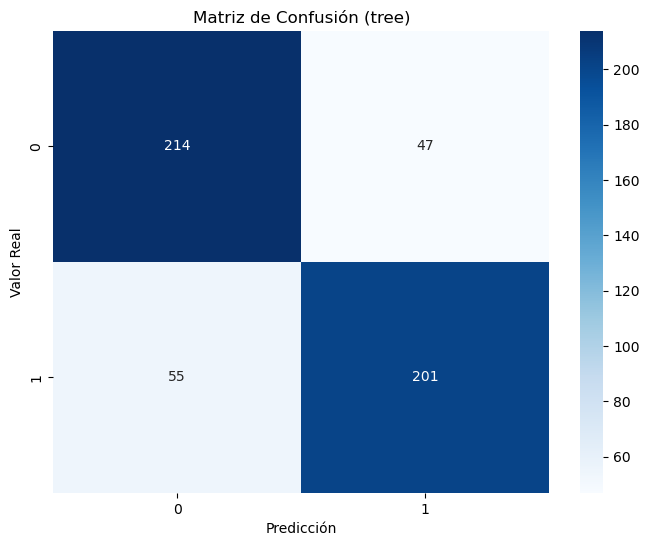

,Feature,Importance
15,TotalWorkingYears_iterative_num_stand,0.202809
9,TrainingTimesLastYear_num_stand,0.107143
10,YearsWithCurrManager_num_stand,0.081418
12,JobSatisfaction_iterative_num_stand,0.059891
0,JobInvolvement_num_stand,0.051957
23,MaritalStatus_cat_Married_stand,0.050019
13,WorkLifeBalance_iterative_num_stand,0.046924
3,DistanceFromHome_num_stand,0.045195
22,MaritalStatus_cat_Divorced_stand,0.041690
5,EducationField_cat_stand,0.037102


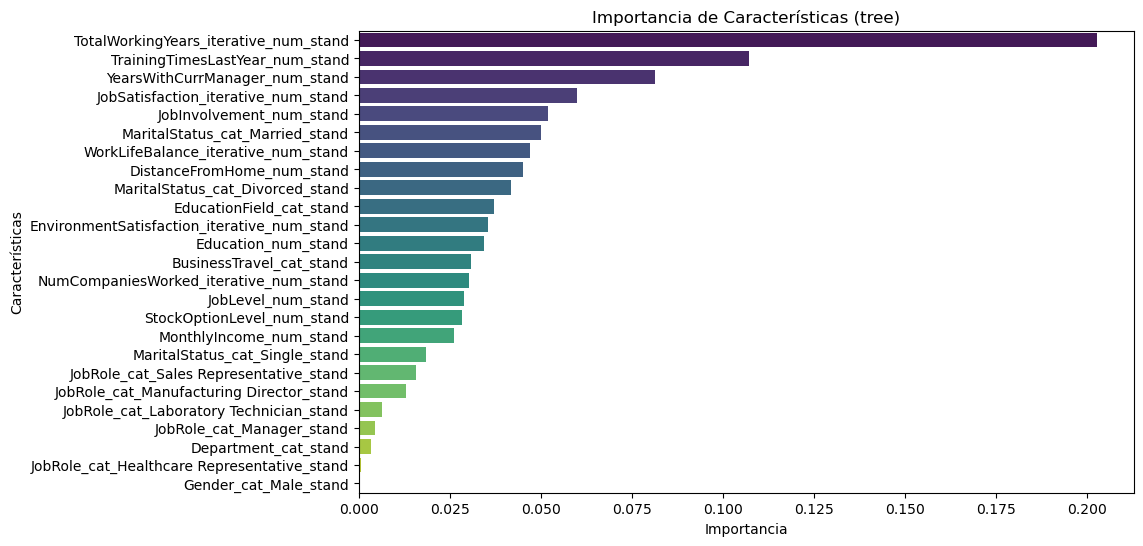

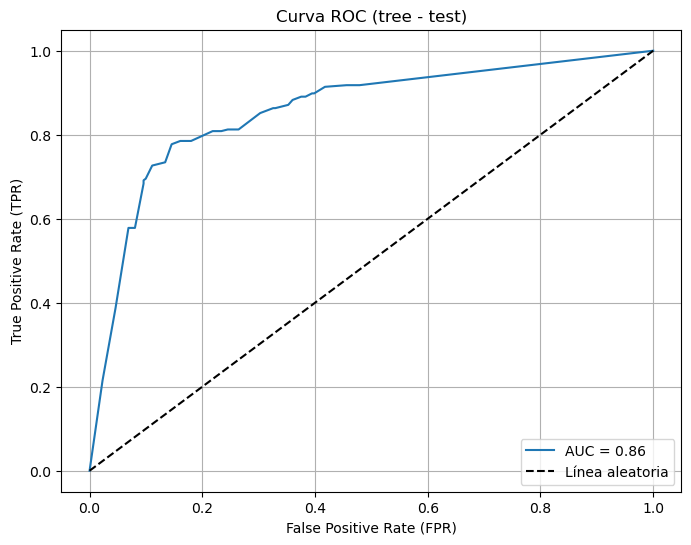

In [13]:
ajuste.ajustar_modelo("tree")
df_resultados_tree = ajuste.calcular_metricas(modelo_nombre =  "tree" )
display (df_resultados_tree.head())
ajuste.plot_matriz_confusion("tree")
ajuste.importancia_predictores("tree")
ajuste.calcular_graficar_roc("tree")
df_resultados_tree["modelo"] = "tree"

df_resultados_final = pd.concat([df_resultados_log, df_resultados_tree], axis = 0)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.051154,NaN,NaN,NaN
test,0.916828,0.919536,0.916828,0.916658,0.833509,0.965794,NaN,NaN,0.051154,NaN


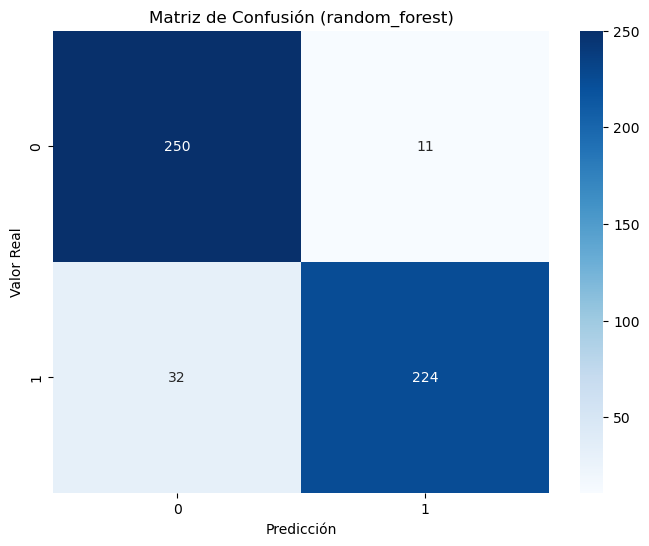

,Feature,Importance
15,TotalWorkingYears_iterative_num_stand,0.112613
10,YearsWithCurrManager_num_stand,0.099629
11,EnvironmentSatisfaction_iterative_num_stand,0.067491
12,JobSatisfaction_iterative_num_stand,0.066683
14,NumCompaniesWorked_iterative_num_stand,0.061511
7,MonthlyIncome_num_stand,0.058348
9,TrainingTimesLastYear_num_stand,0.057094
3,DistanceFromHome_num_stand,0.053906
4,Education_num_stand,0.041871
6,JobLevel_num_stand,0.041856


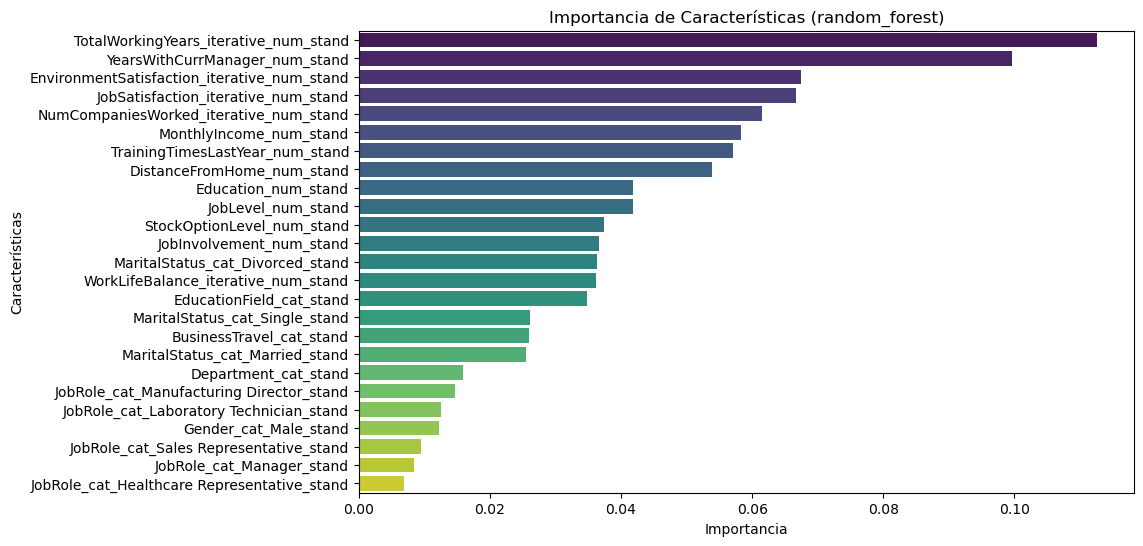

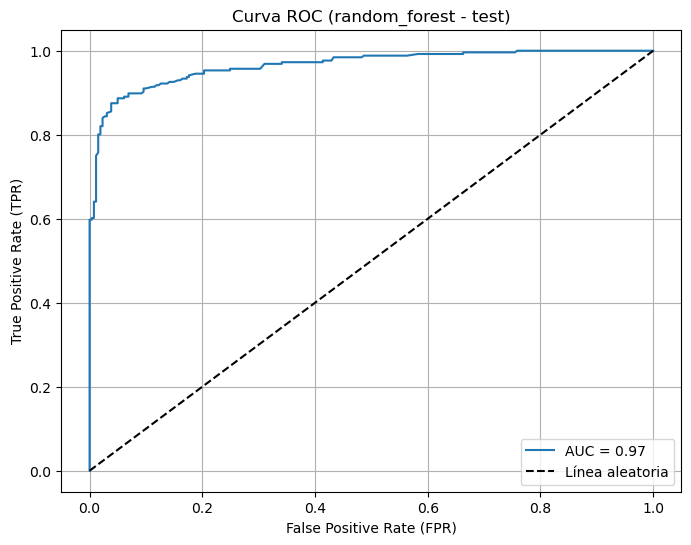

In [14]:
ajuste.ajustar_modelo("random_forest")
df_resultados_forest = ajuste.calcular_metricas(modelo_nombre =  "random_forest" )
display (df_resultados_forest.head())
ajuste.plot_matriz_confusion("random_forest")
ajuste.importancia_predictores("random_forest")
ajuste.calcular_graficar_roc("random_forest")
df_resultados_forest["modelo"] = "Random forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)

In [ ]:
parametros = {
            "logistic_regression": [
                {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
                {'penalty': ['l2'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
                {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
                {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [10000]}
                ]              
            ,
            "tree": {
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200,300],
                'learning_rate': [0.09, 0.1, 0.2],
                'max_depth': [2,3,4],
                'min_child_weight': [3, 5, 7],
                'subsample': [0.7, 0.8],
                'colsample_bytree': [0.8, 1.0]
            }
        }

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.997581,0.997585,0.997581,0.997581,0.995162,0.999973,0.014905,NaN,NaN,NaN
test,0.899420,0.903411,0.899420,0.899115,0.798625,0.962509,NaN,NaN,0.014905,NaN


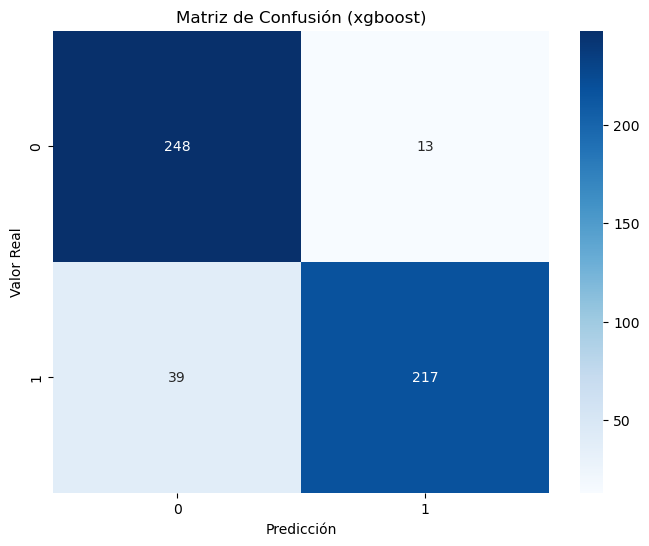

,Feature,Importance
20,JobRole_cat_Manufacturing Director_stand,0.083989
22,MaritalStatus_cat_Divorced_stand,0.083870
11,EnvironmentSatisfaction_iterative_num_stand,0.064438
12,JobSatisfaction_iterative_num_stand,0.059702
15,TotalWorkingYears_iterative_num_stand,0.048862
23,MaritalStatus_cat_Married_stand,0.047269
9,TrainingTimesLastYear_num_stand,0.046307
21,JobRole_cat_Sales Representative_stand,0.043506
10,YearsWithCurrManager_num_stand,0.042510
24,MaritalStatus_cat_Single_stand,0.042281


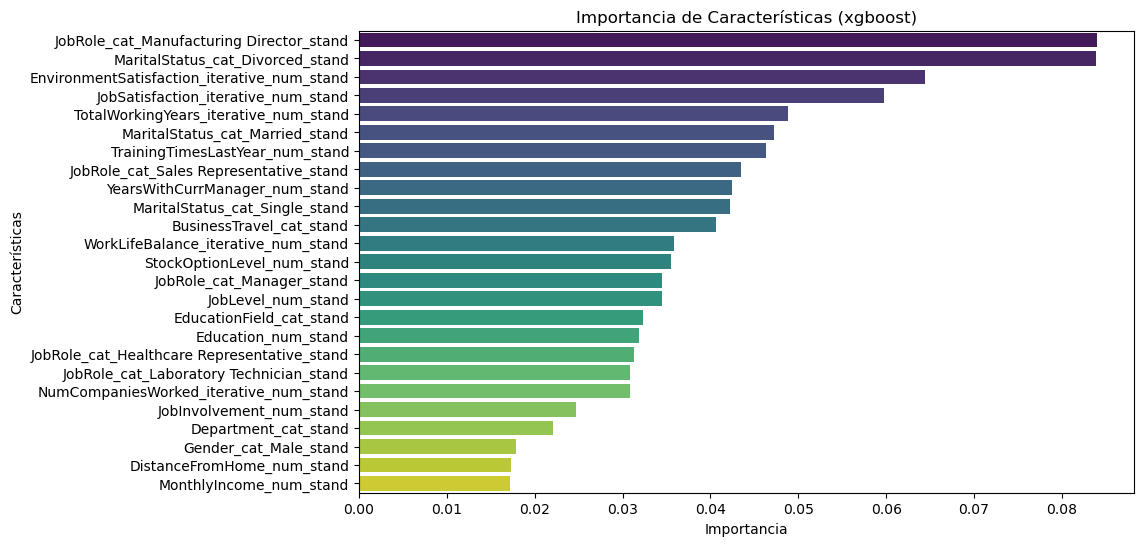

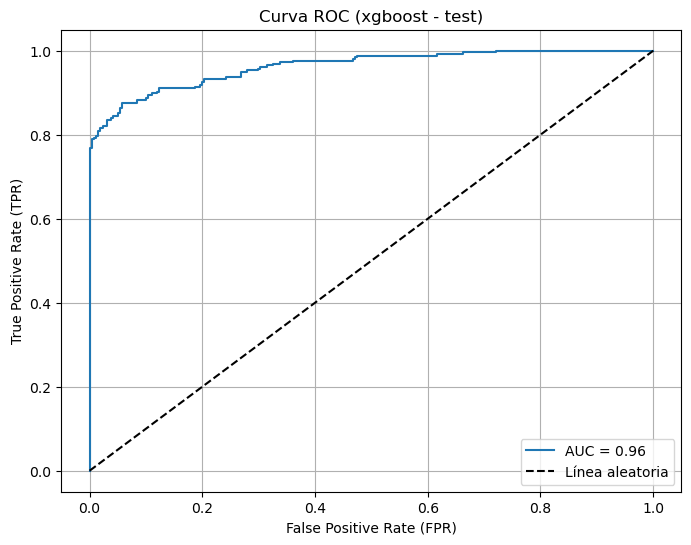

In [23]:
ajuste.ajustar_modelo("xgboost",param_grid= parametros)
df_resultados_xgboost = ajuste.calcular_metricas(modelo_nombre =  "xgboost", )
display (df_resultados_xgboost.head())
ajuste.plot_matriz_confusion("xgboost")
ajuste.importancia_predictores("xgboost")
ajuste.calcular_graficar_roc("xgboost")

df_resultados_xgboost["modelo"] = "xgboost"

df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.008774,16.0,NaN,NaN
test,0.889749,0.892769,0.889749,0.889482,0.779287,0.958857,NaN,NaN,0.008774,16.0


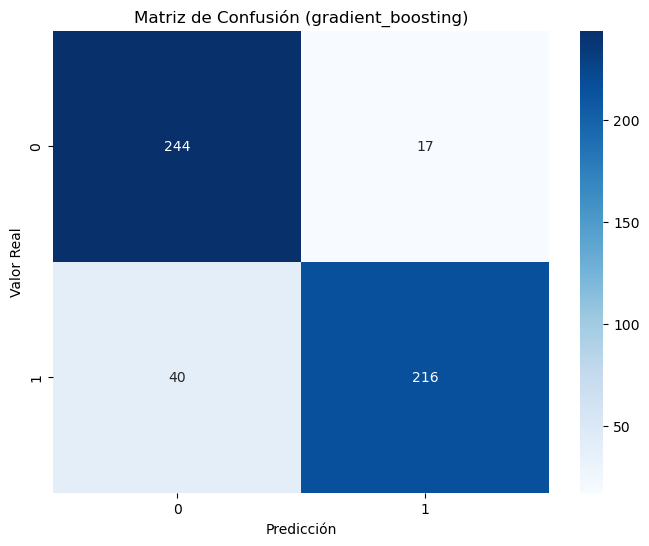

,Feature,Importance
15,TotalWorkingYears_iterative_num_stand,0.142644
11,EnvironmentSatisfaction_iterative_num_stand,0.101039
10,YearsWithCurrManager_num_stand,0.095175
12,JobSatisfaction_iterative_num_stand,0.070483
14,NumCompaniesWorked_iterative_num_stand,0.065275
9,TrainingTimesLastYear_num_stand,0.055880
8,StockOptionLevel_num_stand,0.049162
7,MonthlyIncome_num_stand,0.047661
3,DistanceFromHome_num_stand,0.038640
0,JobInvolvement_num_stand,0.038082


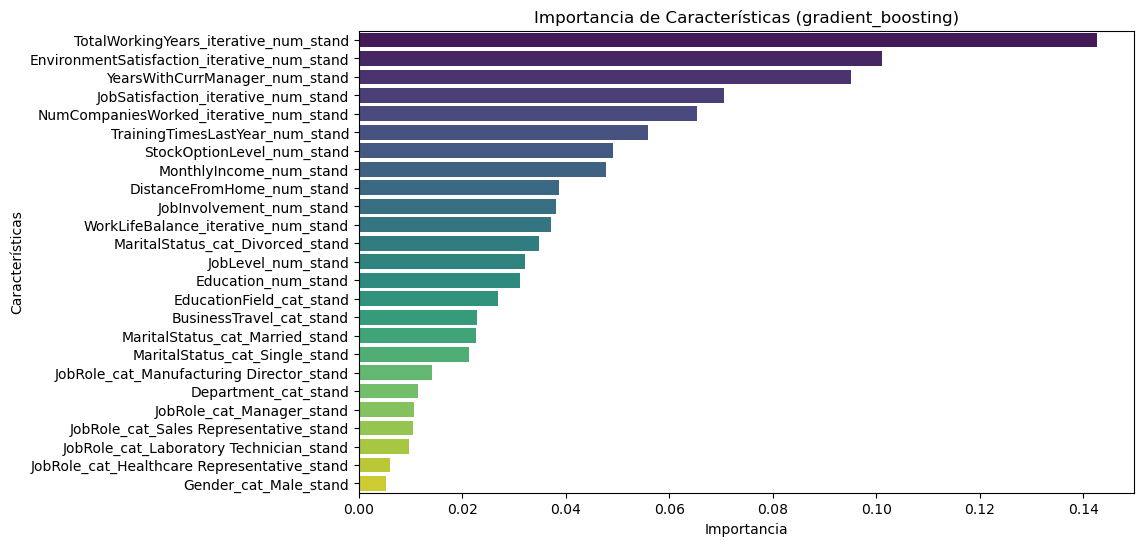

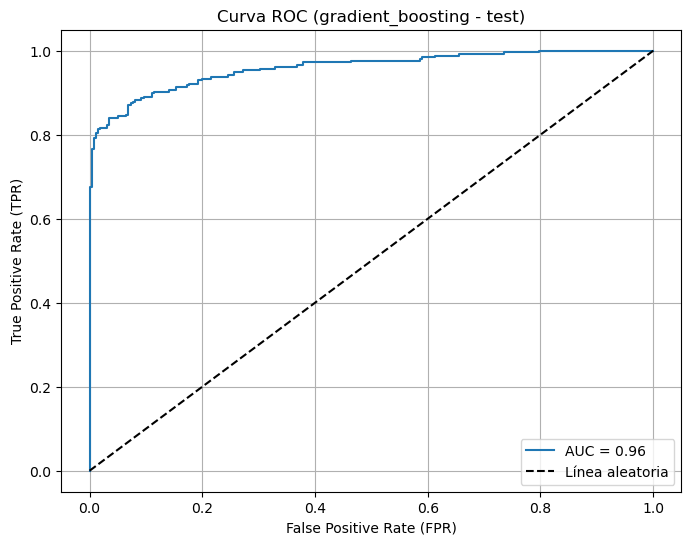

In [16]:
ajuste.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = ajuste.calcular_metricas(modelo_nombre =  "gradient_boosting" )
display (df_resultados_gradient_boosting.head())
ajuste.plot_matriz_confusion("gradient_boosting")
ajuste.importancia_predictores("gradient_boosting")
ajuste.calcular_graficar_roc("gradient_boosting")
df_resultados_gradient_boosting["modelo"] = "gradient_boosting"

df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient_boosting], axis = 0)

In [17]:
# Función para asignar colores
def color_filas_por_modelo(row):
    if row["modelo"] == "tree":
        return ["background-color: #e6b3e0; color: black"] * len(row)  
    
    elif row["modelo"] == "Random forest":
        return ["background-color: #c2f0c2; color: black"] * len(row) 

    elif row["modelo"] == "gradient_boosting":
        return ["background-color: #ffd9b3; color: black"] * len(row)  

    elif row["modelo"] == "xgboost":
        return ["background-color: #f7b3c2; color: black"] * len(row)  

    elif row["modelo"] == "regresion logistica":
        return ["background-color: #b3d1ff; color: black"] * len(row)  
    
    # Caso por defecto
    return ["color: black"] * len(row)


In [24]:
df_resultados_final = df_resultados_final.reset_index()
df_resultados_final = df_resultados_final.drop(columns = ["time_seconds","n_jobs","tiempo_computacion(segundos)","nucleos_usados"])
df_styled = df_resultados_final.style.apply(color_filas_por_modelo, axis=1)

In [25]:
df_styled 

,level_0,index,accuracy,precision,recall,f1,kappa,auc,modelo
0,0,train,0.782293,0.782370,0.782293,0.782272,0.564565,0.865450,regresion logistica
1,1,test,0.789168,0.791253,0.789168,0.788903,0.578628,0.869822,regresion logistica
2,2,train,0.914369,0.914908,0.914369,0.914345,0.828751,0.974132,tree
3,3,test,0.802708,0.802939,0.802708,0.802631,0.605261,0.856868,tree
4,4,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Random forest
5,5,test,0.916828,0.919536,0.916828,0.916658,0.833509,0.965794,Random forest
6,6,train,0.997581,0.997585,0.997581,0.997581,0.995162,0.999973,xgboost
7,7,test,0.899420,0.903411,0.899420,0.899115,0.798625,0.962509,xgboost
8,8,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient_boosting
9,9,test,0.889749,0.892769,0.889749,0.889482,0.779287,0.958857,gradient_boosting


En este modelo tenemos mucho más overfitting pero hemos visto que marital_status es efectivamente útil. Para la proxima iteración mantendermos aquellos outliers no erróneos y los demás los imputaremos por la mediana. También eliminaremos más columnas 